<a href="https://colab.research.google.com/github/v-i-s-h-a-l-l/PT-1/blob/main/players_salary_prediction_ipl_auction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_excel('/content/players2.xlsx')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head(12)

,Player Name,Batting Average,Bowling Economy,Strike Rate,Runs Scored,Wickets Taken,Previous Auction Price (INR),Retained/Bought (Previous IPL),Player Type,Age,International Experience,Recent Form (Domestic/International),Country of Origin,Leadership
0,Jos Buttler,35.25,0.00,142.5,3800,0,8.00,1,1,33,2,1,2,1
1,Shreyas Iyer,42.15,0.00,130.0,2500,0,12.50,1,1,29,1,1,1,1
2,Rishabh Pant,35.50,0.00,135.0,3000,0,16.00,1,4,26,1,1,1,1
3,Kagiso Rabada,17.30,8.20,0.0,0,60,10.00,2,2,28,2,2,2,2
4,Arshdeep Singh,10.80,7.50,0.0,0,25,6.75,2,2,24,1,1,1,2
5,Mitchell Starc,9.80,7.10,0.0,0,70,24.00,2,2,34,2,1,2,1
6,Yuzvendra Chahal,3.00,7.60,0.0,0,200,12.00,1,2,33,1,2,1,2
7,Liam Livingstone,31.50,8.33,160.0,1500,0,11.00,1,3,30,2,1,2,2
8,David Miller,37.80,0.00,145.0,2000,0,8.50,1,1,34,2,3,2,2
9,KL Rahul,43.00,0.00,130.0,4000,0,17.00,1,1,32,1,3,1,1


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 13, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=13, random_state=0)

In [ ]:
import math

multiple_players = [
    [35.25, 0, 142.5, 3800, 0, 8.0, 1, 1, 33, 2, 1, 2],  # Jos Buttler
    [42.15, 0, 130.0, 2500, 0, 12.5, 1, 1, 29, 1, 1, 1],  # Shreyas Iyer
    [35.50, 0, 135.0, 3000, 0, 16.0, 1, 4, 26, 1, 1, 1],  # Rishabh Pant
    [17.30, 8.2, 0.0, 0, 60, 10.0, 2, 2, 28, 2, 2, 2],  # Kagiso Rabada
    [10.80, 7.5, 0.0, 0, 25, 6.75, 2, 2, 24, 1, 1, 1],  # Arshdeep Singh
    [9.80, 7.1, 0.0, 0, 70, 24.0, 2, 2, 34, 2, 1, 2],  # Mitchell Starc
    [3.00, 7.6, 0.0, 0, 200, 12.0, 1, 2, 33, 1, 2, 1],  # Yuzvendra Chahal
    [31.50, 8.33, 160.0, 1500, 0, 11.0, 1, 3, 30, 2, 1, 2],  # Liam Livingstone
    [37.80, 0, 145.0, 2000, 0, 8.5, 1, 1, 34, 2, 3, 2],  # David Miller
    [43.00, 0, 130.0, 4000, 0, 17.0, 1, 1, 32, 1, 3, 1],  # KL Rahul
    [0.00, 8.0, 0.0, 0, 150, 12.0, 1, 2, 33, 1, 3, 1],  # Mohammed Shami
    [7.00, 7.5, 0.0, 0, 50, 7.0, 1, 2, 29, 1, 3, 1],  # Mohammed Siraj
]


print("Shape of training data (X):", X.shape)

num_features_training = X.shape[1]
print("Number of features in training data:", num_features_training)

num_features_prediction = len(multiple_players[0])
print("Number of features in prediction data:", num_features_prediction)

if num_features_training != num_features_prediction:
    raise ValueError(f"Mismatch in features: Training data has {num_features_training} features, but prediction data has {num_features_prediction} features.")
else:

    predicted_prices = regressor.predict(multiple_players)


    predicted_prices = predicted_prices * 10

    print("Predicted Auction Prices (INR):")
    for price in predicted_prices:
        print(f"₹ {price:.2f} Crore")


Shape of training data (X): (12, 12)
Number of features in training data: 12
Number of features in prediction data: 12
Predicted Auction Prices (INR):
₹ 11.54 Crore
₹ 10.77 Crore
₹ 10.77 Crore
₹ 20.00 Crore
₹ 20.00 Crore
₹ 13.85 Crore
₹ 20.00 Crore
₹ 20.00 Crore
₹ 15.38 Crore
₹ 10.77 Crore
₹ 20.00 Crore
₹ 20.00 Crore


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 0.34333333333333327
MSE: 0.1816333333333333
RMSE: 0.4261846235299126
R²: 0.1826500000000001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: X has 1 features, but RandomForestRegressor is expecting 12 features as input.

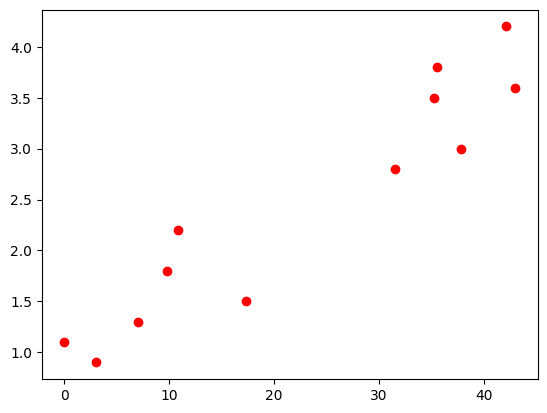

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the feature matrix X and target variable y
# X is your input features and y is your target (e.g., player salaries)

# Ensure X is a numpy array, and y is a numpy array (or a pandas Series)
X = np.array([
    [35.25, 0, 142.5, 3800, 0, 8.0, 1, 1, 33, 2, 1, 2],
    [42.15, 0, 130.0, 2500, 0, 12.5, 1, 1, 29, 1, 1, 1],
    [35.50, 0, 135.0, 3000, 0, 16.0, 1, 4, 26, 1, 1, 1],
    [17.30, 8.2, 0.0, 0, 60, 10.0, 2, 2, 28, 2, 2, 2],
    [10.80, 7.5, 0.0, 0, 25, 6.75, 2, 2, 24, 1, 1, 1],
    [9.80, 7.1, 0.0, 0, 70, 24.0, 2, 2, 34, 2, 1, 2],
    [3.00, 7.6, 0.0, 0, 200, 12.0, 1, 2, 33, 1, 2, 1],
    [31.50, 8.33, 160.0, 1500, 0, 11.0, 1, 3, 30, 2, 1, 2],
    [37.80, 0, 145.0, 2000, 0, 8.5, 1, 1, 34, 2, 3, 2],
    [43.00, 0, 130.0, 4000, 0, 17.0, 1, 1, 32, 1, 3, 1],
    [0.00, 8.0, 0.0, 0, 150, 12.0, 1, 2, 33, 1, 3, 1],
    [7.00, 7.5, 0.0, 0, 50, 7.0, 1, 2, 29, 1, 3, 1]
])

# Example target values (player salaries in crores)
y = np.array([3.5, 4.2, 3.8, 1.5, 2.2, 1.8, 0.9, 2.8, 3.0, 3.6, 1.1, 1.3])

# Assuming you have already trained the Random Forest Regressor model (regressor)
# Here, we create a simple random forest model for demonstration purposes
from sklearn.ensemble import RandomForestRegressor

# Let's assume you trained your model (regressor) on X and y
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X, y)

# Now, let's plot the predictions for the first feature
X_feature = X[:, 0]  # Take the first feature from X

# Create a smoother grid of values for X_feature
X_grid = np.linspace(min(X_feature), max(X_feature), 1000)  # 1000 points for smoothness
X_grid = X_grid.reshape((len(X_grid), 1))  # Reshape for prediction

# Create the plot
plt.scatter(X_feature, y, color='red', label='Actual data')  # Scatter plot for actual data
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='Prediction')  # Predicted line

plt.title('Player Salary Prediction (Random Forest Regression)')
plt.xlabel('Player Feature')  # Label for the X-axis (first feature)
plt.ylabel('Predicted Salary')  # Label for the Y-axis (salary)
plt.legend()
plt.show()

